## Genetic Algorithm for Titanic Data Set

Train a feedforward neural network (with sigmoidal node functions and a hidden layer with twice as many nodes as the input dimensionality) for a 2-class classification task using GA/ES/PSO;  compare with backpropagation.

https://www.kaggle.com/c/titanic/data

In [63]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### Importing dataset

In [2]:
train = pd.read_csv('./titanic_dataset/train.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Dropping the columns that dont have co-relation with survival

In [5]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1, inplace=True)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
train.shape

(891, 8)

### Dropping rows that do not have age values

In [8]:
train.dropna(subset=['Age'],inplace=True)

In [9]:
train.shape

(714, 8)

In [10]:
print("Missing Value Embarked count: ",train.Embarked.isnull().sum())
print("Missing Value Pclass count: ",train.Pclass.isnull().sum())
print("Missing Value Sex count: ",train.Sex.isnull().sum())
print("Missing Value SibSp count: ",train.SibSp.isnull().sum())
print("Missing Value Parch count: ",train.Parch.isnull().sum())
print("Missing Value Fare count: ",train.Fare.isnull().sum())

Missing Value Embarked count:  2
Missing Value Pclass count:  0
Missing Value Sex count:  0
Missing Value SibSp count:  0
Missing Value Parch count:  0
Missing Value Fare count:  0


In [11]:
train['Embarked'].fillna('S',inplace=True)

### Converting non numeric Embarked values and Sex values to numeric type

In [12]:
def convertEmbarkedValues(val):
    if val == 'S':
        return 1
    elif val == 'C':
        return 2
    else:
        return 3

In [13]:
def convertSexValues(val):
    if val == 'male':
        return 0
    elif val == 'female':
        return 1
    else:
        return 2

In [14]:
train['Embarked_Val'] = train.apply(lambda row: convertEmbarkedValues(row['Embarked']), axis=1)

In [15]:
train['Sex_Val'] = train.apply(lambda row: convertSexValues(row['Sex']), axis=1)

In [16]:
train.drop(['Embarked', 'Sex'],axis=1, inplace=True)

In [17]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Val,Sex_Val
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,2,1
2,1,3,26.0,0,0,7.9250,1,1
3,1,1,35.0,1,0,53.1000,1,1
4,0,3,35.0,0,0,8.0500,1,0


### Neural network using back-propagation

In [18]:
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [57]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.20, random_state=42)

In [20]:
model = Sequential()
model.add(Dense(32, input_dim=7, activation='sigmoid', name='layer_1'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid', name='layer_2'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer_2 (Dense)              (None, 1)                 33        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [21]:
testLayer1 = model.get_layer('layer_1').get_weights()
print(testLayer1[0].shape)
print(testLayer1[1].shape)
testLayer2= model.get_layer('layer_2').get_weights()
print(testLayer2[0].shape)
print(testLayer2[1].shape)

(7, 32)
(32,)
(32, 1)
(1,)


In [22]:
testLayer1[1] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
t0 = time.time()
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.1)
t1 = time.time()

print("Time taken to train the model: ", t1-t0, "secs")

Train on 513 samples, validate on 58 samples
Epoch 1/50
513/513 [==============================] - 2s 4ms/step - loss: 0.6386 - acc: 0.6511 - val_loss: 0.5957 - val_acc: 0.7069
Epoch 2/50
513/513 [==============================] - 0s 723us/step - loss: 0.6145 - acc: 0.6862 - val_loss: 0.5887 - val_acc: 0.7069
Epoch 3/50
513/513 [==============================] - 0s 569us/step - loss: 0.6097 - acc: 0.6998 - val_loss: 0.5896 - val_acc: 0.7069
Epoch 4/50
513/513 [==============================] - 0s 715us/step - loss: 0.6001 - acc: 0.7018 - val_loss: 0.5935 - val_acc: 0.7069
Epoch 5/50
513/513 [==============================] - 0s 546us/step - loss: 0.5883 - acc: 0.6940 - val_loss: 0.5782 - val_acc: 0.7241
Epoch 6/50
513/513 [==============================] - 0s 610us/step - loss: 0.5918 - acc: 0.7037 - val_loss: 0.5733 - val_acc: 0.7241
Epoch 7/50
513/513 [==============================] - 0s 601us/step - loss: 0.5877 - acc: 0.7018 - val_loss: 0.5755 - val_acc: 0.7241
Epoch 8/50
513/513 

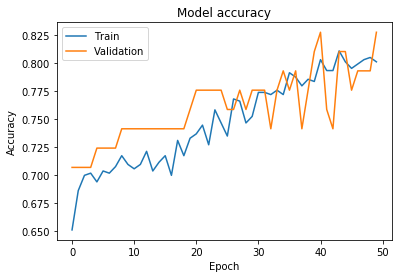

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

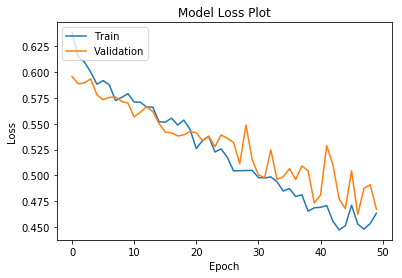

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
eval_val = model.evaluate(x_test, y_test)

143/143 [==============================] - 0s 70us/step


In [28]:
print('The model has %f accuracy on the test data' % (eval_val[1] * 100))

The model has 74.825175 accuracy on the test data


In [29]:
y_pred = model.predict_classes(x_test)

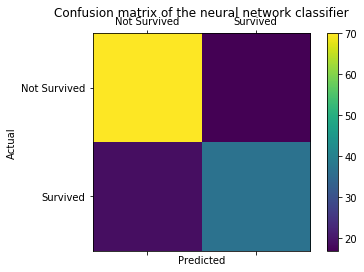

In [30]:
confusion_matrix_val = confusion_matrix(y_test, y_pred)
labels = ['Not Survived', 'Survived']

# Create the plot figure 
fig = plt.figure()

# Comfusion Matrix subplot
subplt = fig.add_subplot(111)
csubplt = subplt.matshow(confusion_matrix_val)

plt.title('Confusion matrix of the neural network classifier')
fig.colorbar(csubplt)

subplt.set_xticklabels([''] + labels)
subplt.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

From the above plot, we see that the number of correct values predicted is more than the incorrect values.

### Genetic Algorithm Implementation to get an optimal neural network model

In [31]:
from random import randint, random
import functools 
from operator import add
import numpy as np

np.random.seed(0)

In [32]:
def createWeights(m,n):
    return np.random.uniform(-1,1,(m,n))

def createBiases(n):
    return np.random.uniform(-1,1,n)

def individual():
    'Create a neural network model which is the member of the population.'
    model = Sequential()
    model.add(Dense(32, input_dim=7, activation='sigmoid', name='layer_1'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid', name='layer_2'))
    #model.summary()
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    model.get_layer('layer_1').set_weights([createWeights(7,32), createBiases(32)])
    model.get_layer('layer_2').set_weights([createWeights(32,1), createBiases(1)])
    return model

In [33]:
def getChildWeights(father, mother, layer):
    'Create a mix of weights from both parents'
    fatherWeights = father.get_layer(layer).get_weights()[0]
    motherWeights = mother.get_layer(layer).get_weights()[0]
    
    childWeights = np.zeros(fatherWeights.shape)
    # Randomizing only the row values
    indexStatus = np.random.randint(2, size=(fatherWeights.shape[0],))
    
    for index in range(fatherWeights.shape[0]):
        if indexStatus[index] == 0:
            childWeights[index] = fatherWeights[index]
        else:
            childWeights[index] = motherWeights[index]
    
    return childWeights
    
def getChildBias(father, mother, layer):
    'Create a mix of biases from both parents'
    father_bias = father.get_layer(layer).get_weights()[1]
    mother_bias = mother.get_layer(layer).get_weights()[1]
    
    child_bias = np.zeros(father_bias.shape)
    # Randomizing only the row values
    indexStatus = np.random.randint(2, size=(father_bias.shape[0],))
    
    for index in range(father_bias.shape[0]):
        if indexStatus[index] == 0:
            child_bias[index] = father_bias[index]
        else:
            child_bias[index] = mother_bias[index]

    return child_bias

In [34]:
def child(father, mother):
    'Create a new neural network model child which is the member of the population.'
    model = Sequential()
    model.add(Dense(32, input_dim=7, activation='sigmoid', name='layer_1'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid', name='layer_2'))
    #model.summary()
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    # Cross Breed the weights and biases
    model.get_layer('layer_1').set_weights([getChildWeights(father, mother, 'layer_1'), getChildBias(father, mother, 'layer_1')])
    model.get_layer('layer_2').set_weights([getChildWeights(father, mother, 'layer_2'), getChildBias(father, mother, 'layer_2')])
    
    return model

In [35]:
def mutateWeights(individual, layer):
    'Randomly mutate the weights of an individual'
    individualWeights = individual.get_layer(layer).get_weights()[0]
    randomWeights = createWeights(individualWeights.shape[0], individualWeights.shape[1])
    
    mutateWeights = np.zeros(individualWeights.shape)
    indexStatus = np.random.randint(2, size=(individualWeights.shape[0],))
    
    for index in range(individualWeights.shape[0]):
        if indexStatus[index] == 0:
            mutateWeights[index] = individualWeights[index]
        else:
            mutateWeights[index] = randomWeights[index]
    
    return mutateWeights
    
def mutatedBias(individual, layer):
    'Randomly mutate the biases of an individual'
    individual_bias = individual.get_layer(layer).get_weights()[1]
    random_bias = createBiases(individual_bias.shape[0])
    
    mutated_bias = np.zeros(individual_bias.shape)
    indexStatus = np.random.randint(2, size=(individual_bias.shape[0],))
    
    for index in range(individual_bias.shape[0]):
        if indexStatus[index] == 0:
            mutated_bias[index] = individual_bias[index]
        else:
            mutated_bias[index] = random_bias[index]

    return mutated_bias

In [36]:
def population(count):
    'count: the number of individuals in the population'
    return [ individual() for ind in range(count) ]

In [37]:
def fitness(individual, x, y):
    'Determine the fitness of an individual. Higher is better.'
    return individual.evaluate(x, y)[1]

In [38]:
def grade(pop, x, y):
    'Find average fitness for a population.'
    summed = functools.reduce(add, (fitness(ind, x, y) for ind in pop))
    return summed / (len(pop) * 1.0)

The evolve function uses the above functions to generates a new population with the retain, random selection and mutation criterias.

In [69]:
def evolve(pop, dataset_x, dataset_y, retain=0.2, random_select=0.05, mutate=0.01):
    graded = [ (fitness(ind, dataset_x, dataset_y), ind) for ind in pop]
    graded = [ x[1] for x in sorted(graded, key=lambda tup: tup[0])]

    # number of individuals to retain
    retain_length = int(len(graded)*retain)
    parents = graded[-retain_length:]
    
    # randomly pick individuals to retain
    for individual in graded[:len(graded)-retain_length:]:
        if random_select > random():
            parents.append(individual)
    
    # mutate some individuals
    for individual in parents:
        if mutate > random():
            individual.get_layer('layer_1').set_weights([mutateWeights(individual, 'layer_1'), mutatedBias(individual, 'layer_1')])
            individual.get_layer('layer_2').set_weights([mutateWeights(individual, 'layer_2'), mutatedBias(individual, 'layer_2')])
    
    # Cross bread parents to create children with the count of the initial population size
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        father = randint(0, parents_length-1)
        mother = randint(0, parents_length-1)
        if father != mother:
            father = parents[father]
            mother = parents[mother]
            children.append(child(father, mother))        
    parents.extend(children)

    return parents

Create the initial population and calculate the average fitness of the population

In [70]:
p_count = 10
pop = population(p_count)
average_fitness_history = [grade(pop, x_train, y_train),]

571/571 [==============================] - 2s 3ms/step


In [71]:
generationCount = 10
for i in range(generationCount):
    print('Started running the %d generation' % (i))
    pop = evolve(pop, x_train, y_train)
    fitness_val = grade(pop, x_train, y_train)
    print('Completed running the %d generation with mean accuracy of: %f' % (i, fitness_val))
    average_fitness_history.append(fitness_val)

Started running the 0 generation
571/571 [==============================] - 2s 3ms/step
Completed running the 0 generation with mean accuracy of: 0.619089
Started running the 1 generation
571/571 [==============================] - 2s 3ms/step
Completed running the 1 generation with mean accuracy of: 0.650263
Started running the 2 generation
571/571 [==============================] - 2s 3ms/step
Completed running the 2 generation with mean accuracy of: 0.675306
Started running the 3 generation
571/571 [==============================] - 2s 3ms/step
Completed running the 3 generation with mean accuracy of: 0.681261
Started running the 4 generation
571/571 [==============================] - 2s 4ms/step
Completed running the 4 generation with mean accuracy of: 0.694571
Started running the 5 generation
571/571 [==============================] - 2s 3ms/step
Completed running the 5 generation with mean accuracy of: 0.702452
Started running the 6 generation
571/571 [============================

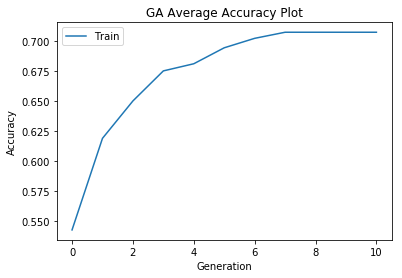

In [78]:
plt.plot(average_fitness_history)
plt.title('GA Average Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Generation')
plt.legend(['Train'], loc='upper left')
plt.show()

We see that the average accuracy increases with increase in the generation count

In [80]:
pop[0].evaluate(x_train, y_train)

571/571 [==============================] - 0s 196us/step


[0.6451380888551421, 0.7075306471508982]

In [81]:
print('The model has %f accuracy on the train data using genetic algorithm optimized neural network' % (pop[0].evaluate(x_train, y_train)[1] * 100))

571/571 [==============================] - 0s 224us/step
The model has 70.753065 accuracy on the train data using genetic algorithm optimized neural network


In [74]:
eval_val_ga = pop[0].evaluate(x_test, y_test)

143/143 [==============================] - 0s 186us/step


In [75]:
print('The model has %f accuracy on the test data using genetic algorithm optimized neural network' % (eval_val_ga[1] * 100))

The model has 62.237762 accuracy on the test data using genetic algorithm optimized neural network


#### Predict the classes for test data

In [76]:
y_pred_ga = pop[0].predict_classes(x_test)

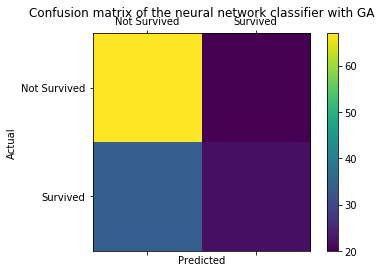

In [77]:
confusion_matrix_val_ga = confusion_matrix(y_test, y_pred_ga)
labels = ['Not Survived', 'Survived']

# Create the plot figure 
fig = plt.figure()

# Confusion Matrix subplot
subplt = fig.add_subplot(111)
csubplt = subplt.matshow(confusion_matrix_val_ga)

plt.title('Confusion matrix of the neural network classifier with GA')
fig.colorbar(csubplt)

subplt.set_xticklabels([''] + labels)
subplt.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusion

We see that the overall accuracy of the models generated using genetic algorithm increases with more generations. We also note that the training accuracy of 70% is reached for the genetic based neural network compared to 80% reached using backpropogation algorithm.

*Note:* We were limited by the resources to run for more number of generations in genetic algorithm and limited it to 10 generations.